C:\Users\PC\AppData\Roaming\Python\Python313\site-packages\pretty_midi\instrument.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


True


Sampling: 100%|██████████| 1000/1000 [38:01<00:00,  2.28s/it]


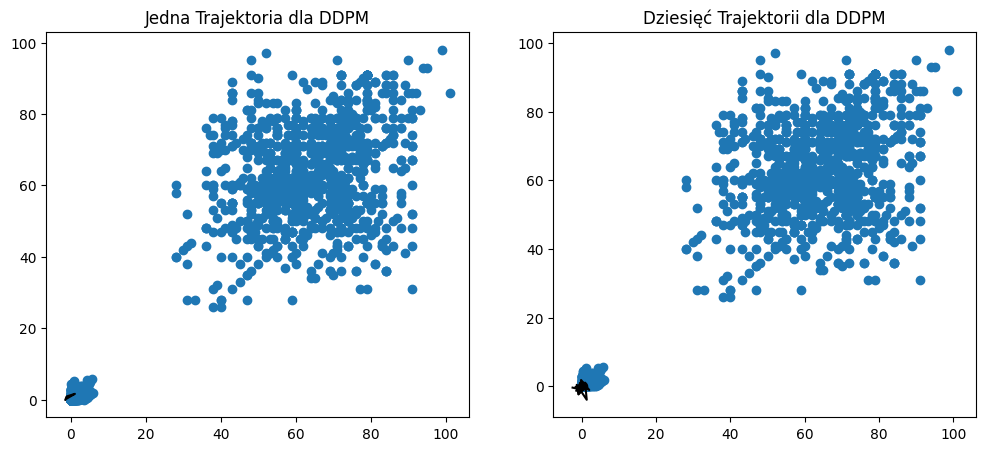

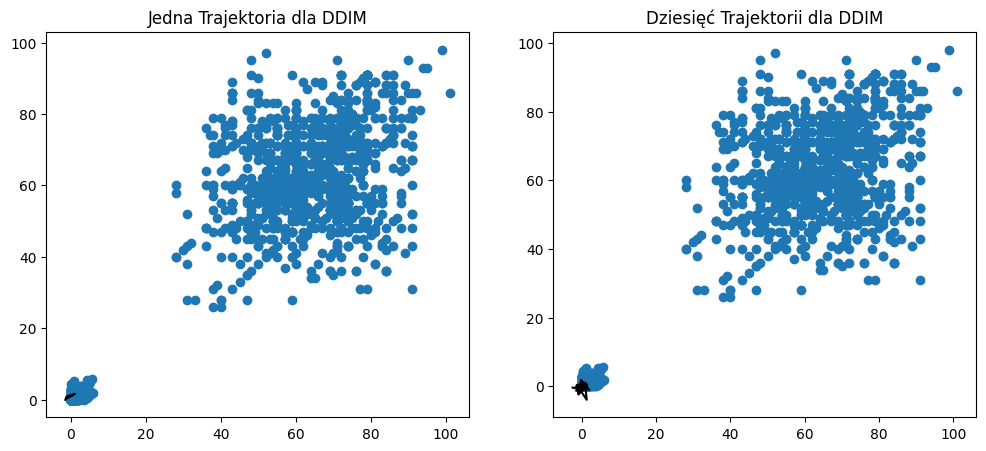

In [1]:
from src.common.diagnostic.compare_trajectories import compare_trajectories
from src.models.diffusion.ddpm import DDPM
from src.models.diffusion.ddim import DDIM
from src.models.representation.ae.auto_encoder import Autoencoder, Decoder, Encoder
import torch
import pickle
from pathlib import Path

NUMBER_OF_SAMPLES = 1000
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'


dataset = pickle.load(open("data/preprocessed_note_events.pkl", "rb"))

DDPM_model = DDPM(device=DEVICE)
DDIM_model = DDIM(device=DEVICE)

path = Path("./models/denoisers/ae/ddpm_midi_autoencoder/ddpm_midi_autoencoder.pth/ddpm_midi_autoencoder.pth")
print(path.exists())

checkpoint = torch.load(path)

encoder = Encoder(
    input_dim=4,
    hidden_dim=128,
    latent_dim=64,
    num_layers=4
)

decoder = Decoder(
    latent_dim=64,
    hidden_dim=128,
    num_layers=4,
    output_dim=4
)

ae_model = Autoencoder(
    encoder=encoder,
    decoder=decoder,
).to(DEVICE)

ae_model.load_state_dict(checkpoint)

compare_trajectories(dataset, DDPM_model, DDIM_model, "DDPM", "DDIM", ae_model, NUMBER_OF_SAMPLES)